In [2]:
from aclg.dataclass.component import Component
from aclg.rules.split.split_basic import split_vertical, split_horizontal
from aclg.rules.symetric.symmetric_1 import split_symmetric_1_horizontal, split_symmetric_1_vertical
from aclg.rules.spacing import spacing_grid

root_component = Component(x=0, y=0, width=100, height=100)

print(f"初始元件: {root_component}")

new_components = spacing_grid(root_component, rows=3, cols=2)

for comp in new_components:
    print(f"新元件: {comp}")


初始元件: Component(x=0, y=0, width=100, height=100, level=0, relation_id=0, generate_rule='', sub_components=None)
新元件: Component(x=-25.0, y=-33.33333333333333, width=50.0, height=33.333333333333336, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
新元件: Component(x=25.0, y=-33.33333333333333, width=50.0, height=33.333333333333336, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
新元件: Component(x=-25.0, y=3.552713678800501e-15, width=50.0, height=33.333333333333336, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
新元件: Component(x=25.0, y=3.552713678800501e-15, width=50.0, height=33.333333333333336, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
新元件: Component(x=-25.0, y=33.33333333333334, width=50.0, height=33.333333333333336, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
新元件: Component(x=25.0, y=33.33333333333334, width=50.0, height=33.333333333333336, le

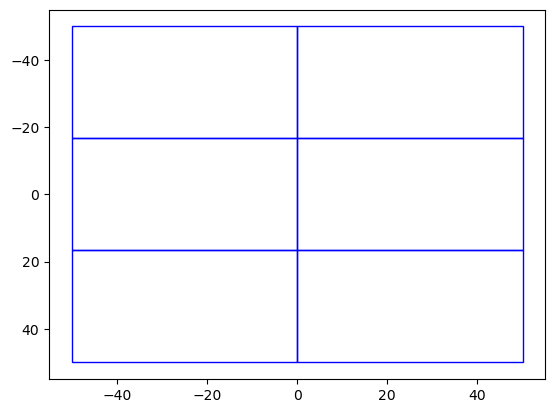

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1)

min_x = min(comp.get_topleft()[0] for comp in new_components) if new_components else 0
min_y = min(comp.get_topleft()[1] for comp in new_components) if new_components else 0
max_x = max(comp.get_bottomright()[0] for comp in new_components) if new_components else 100
max_y = max(comp.get_bottomright()[1] for comp in new_components) if new_components else 80
ax.set_xlim(min_x - 5, max_x + 5)
ax.set_ylim(min_y - 5, max_y + 5)
ax.invert_yaxis()

# 遍歷每一個元件，並繪製矩形
for component in new_components:
    x, y = component.get_topleft()
    width = component.width
    height = component.height
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    center_x = x + width / 2
    center_y = y + height / 2

plt.show()

--- 生成後的元件 (處理前) ---
原始: Component(x=-50.0, y=-25.0, width=50.0, height=50.0, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
原始: Component(x=0.0, y=-25.0, width=50.0, height=50.0, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
原始: Component(x=50.0, y=-25.0, width=50.0, height=50.0, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
原始: Component(x=-50.0, y=25.0, width=50.0, height=50.0, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
原始: Component(x=0.0, y=25.0, width=50.0, height=50.0, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
原始: Component(x=50.0, y=25.0, width=50.0, height=50.0, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)

--- 套用 Padding 後的元件 ---
修改後: Component(x=-50.0, y=-25.0, width=40.0, height=40.0, level=1, relation_id=0, generate_rule='spacing_grid', sub_components=None)
修改後: Component(x=0.0, y=-25.0, width=4

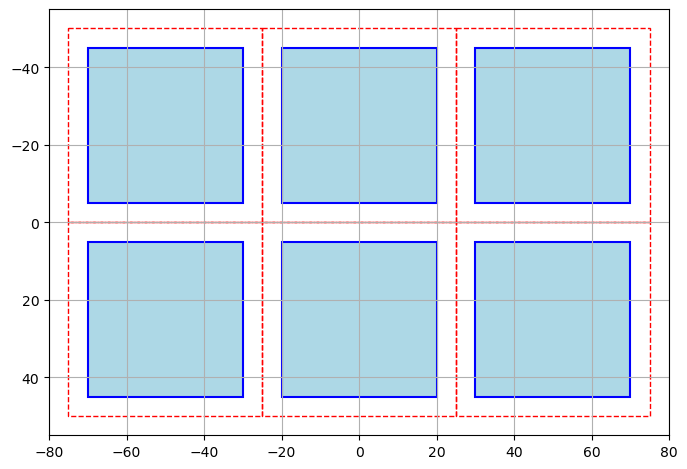

In [5]:
# 1. 正常匯入您需要的類別和生成規則
from aclg.dataclass.component import Component
from aclg.rules.spacing import spacing_grid
# 2. 匯入新的後處理函式
from aclg.post_processing.padding import add_padding

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy
# --- 步驟一: 生成元件 ---
root_component = Component(x=0, y=0, width=150, height=100)
# 使用 create_grid 生成一個 2x3 的網格
generated_components = spacing_grid(root_component, rows=2, cols=3)

print("--- 生成後的元件 (處理前) ---")
for comp in generated_components:
    # 為了方便比較，我們複製一份元件資訊
    original_info = copy.deepcopy(comp)
    print(f"原始: {original_info}")

# --- 步驟二: 應用後處理 ---
# 對所有生成的元件增加 5 個單位的邊界
processed_components = add_padding(generated_components, padding=5)

print("\n--- 套用 Padding 後的元件 ---")
for comp in processed_components:
    print(f"修改後: {comp}") # generate_rule 應該與原始的相同

# --- 步驟三: 視覺化比較 ---
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.set_aspect('equal', adjustable='box')

# 繪製原始的邊界 (虛線) 和處理後的元件 (實線)
for component in processed_components:
    # 計算原始元件的左上角座標和尺寸
    original_width = component.width + 2 * 5
    original_height = component.height + 2 * 5
    original_x = component.x - original_width / 2
    original_y = component.y - original_height / 2
    
    # 繪製原始邊界
    rect_orig = patches.Rectangle((original_x, original_y), original_width, original_height, 
                                  linewidth=1, edgecolor='red', facecolor='none', linestyle='--')
    ax.add_patch(rect_orig)

    # 繪製處理後的元件
    rect_padded = patches.Rectangle(component.get_topleft(), component.width, component.height, 
                                    linewidth=1.5, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(rect_padded)

# 設定坐標軸範圍
ax.set_xlim(-80, 80)
ax.set_ylim(-55, 55)
ax.invert_yaxis()
plt.grid(True)
plt.show()

--- 範例 1: 水平向上對齊 (Top Alignment) ---
原始元件高度: [60.0, 60.0, 60.0]
對齊後元件高度: [60.0, 48.0, 72.0]

--- 範例 2: 垂直向左對齊 (Left Alignment) ---
原始元件寬度: [80.0, 80.0, 80.0]
[Component(x=-8.0, y=-60.0, width=64.0, height=60.0, level=1, relation_id=0, generate_rule='align_left', sub_components=None), Component(x=8.0, y=0.0, width=96.0, height=60.0, level=1, relation_id=0, generate_rule='align_left', sub_components=None), Component(x=0.0, y=60.0, width=80.0, height=60.0, level=1, relation_id=0, generate_rule='align_left', sub_components=None)]
對齊後元件寬度: [64.0, 96.0, 80.0]


c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31684 (\N{CJK UNIFIED IDEOGRAPH-7BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: G

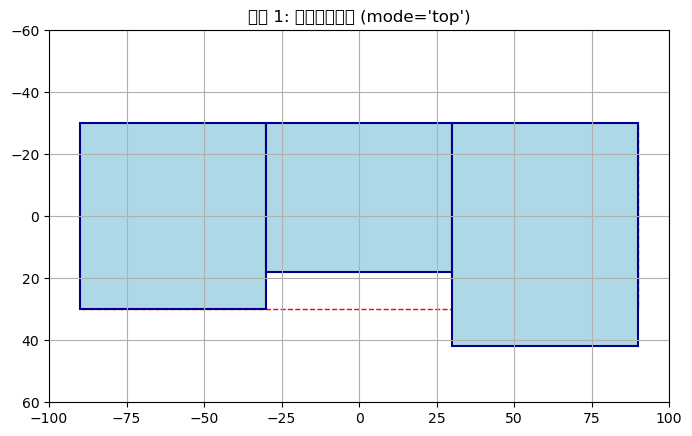

c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22402 (\N{CJK UNIFIED IDEOGRAPH-5782}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24038 (\N{CJK UNIFIED IDEOGRAPH-5DE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


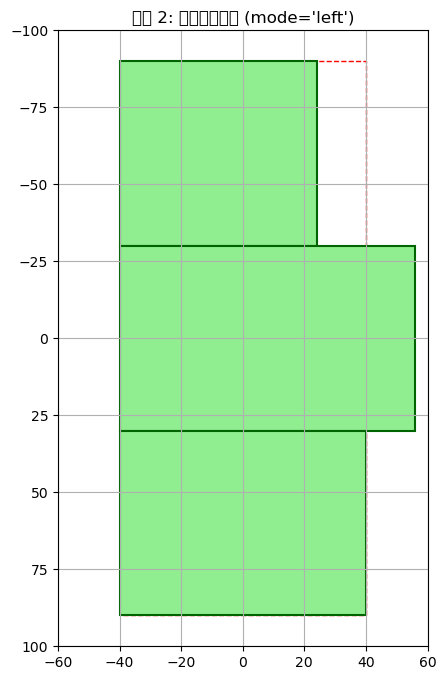

In [1]:
# ===================================================================
# 1. 匯入所有必要的類別與函式
# ===================================================================
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from aclg.dataclass.component import Component
from aclg.rules.spacing import spacing_horizontal, spacing_vertical
from aclg.rules.align import align_components, AlignmentMode

# ===================================================================
# 範例 1: 水平對齊 (Top, Bottom, Center_H)
# ===================================================================
print("--- 範例 1: 水平向上對齊 (Top Alignment) ---")

# --- 步驟 1.1: 生成一排水平的元件 ---
root_comp_h = Component(x=0, y=0, width=180, height=60)
horizontal_comps = spacing_horizontal(root_comp_h, num_components=3)

# 使用 deepcopy 複製一份原始元件用於後續操作，避免互相影響
base_comps_h = copy.deepcopy(horizontal_comps)

# 打印原始高度 (應全部為 60)
print(f"原始元件高度: {[c.height for c in base_comps_h]}")

# --- 步驟 1.2: 定義縮放比例並執行向上對齊 ---
# 第一個元件高度不變 (100%), 第二個變為 80%, 第三個變為 120%
scale_factors_h = [1.0, 0.8, 1.2]

# 使用 AlignmentMode.TOP 進行向上對齊
# 您可以將 mode 改為 AlignmentMode.BOTTOM 或 AlignmentMode.CENTER_H 來觀察不同效果
aligned_comps_h = align_components(
    base_comps_h,
    scale_factors=scale_factors_h,
    mode=AlignmentMode.TOP
)

# 打印對齊後的高度 (預期新高度應為 [60*1.0, 60*0.8, 60*1.2] = [60.0, 48.0, 72.0])
print(f"對齊後元件高度: {[round(c.height, 2) for c in aligned_comps_h]}")

# --- 步驟 1.3: 視覺化水平對齊結果 ---
fig1, ax1 = plt.subplots(1, figsize=(8, 6))
ax1.set_aspect('equal', adjustable='box')
ax1.set_title("範例 1: 水平向上對齊 (mode='top')")

# 繪製原始的父元件邊界 (紅色虛線)
rect_root_h = patches.Rectangle(
    root_comp_h.get_topleft(), root_comp_h.width, root_comp_h.height,
    linewidth=1, edgecolor='red', facecolor='none', linestyle='--'
)
ax1.add_patch(rect_root_h)

# 繪製對齊後的元件 (藍色實心)
for comp in aligned_comps_h:
    rect = patches.Rectangle(
        comp.get_topleft(), comp.width, comp.height,
        linewidth=1.5, edgecolor='darkblue', facecolor='lightblue'
    )
    ax1.add_patch(rect)

ax1.set_xlim(-100, 100)
ax1.set_ylim(-60, 60)
ax1.invert_yaxis()
ax1.grid(True)

# ===================================================================
# 範例 2: 垂直對齊 (Left, Right, Center_V)
# ===================================================================
print("\n--- 範例 2: 垂直向左對齊 (Left Alignment) ---")

# --- 步驟 2.1: 生成一排垂直的元件 ---
root_comp_v = Component(x=0, y=0, width=80, height=180)
vertical_comps = spacing_vertical(root_comp_v, num_components=3)
base_comps_v = copy.deepcopy(vertical_comps)

# 打印原始寬度 (應全部為 80)
print(f"原始元件寬度: {[c.width for c in base_comps_v]}")

# --- 步驟 2.2: 定義縮放比例並執行向左對齊 ---
scale_factors_v = [0.8, 1.2, 1.0]

# 使用 AlignmentMode.LEFT 進行向左對齊
aligned_comps_v = align_components(
    base_comps_v,
    scale_factors=scale_factors_v,
    mode=AlignmentMode.LEFT
)

print(aligned_comps_v)

# 打印對齊後的寬度 (預期新寬度應為 [80*0.8, 80*1.2, 80*1.0] = [64.0, 96.0, 80.0])
print(f"對齊後元件寬度: {[round(c.width, 2) for c in aligned_comps_v]}")

# --- 步驟 2.3: 視覺化垂直對齊結果 ---
fig2, ax2 = plt.subplots(1, figsize=(6, 8))
ax2.set_aspect('equal', adjustable='box')
ax2.set_title("範例 2: 垂直向左對齊 (mode='left')")

# 繪製原始的父元件邊界
rect_root_v = patches.Rectangle(
    root_comp_v.get_topleft(), root_comp_v.width, root_comp_v.height,
    linewidth=1, edgecolor='red', facecolor='none', linestyle='--'
)
ax2.add_patch(rect_root_v)

# 繪製對齊後的元件
for comp in aligned_comps_v:
    rect = patches.Rectangle(
        comp.get_topleft(), comp.width, comp.height,
        linewidth=1.5, edgecolor='darkgreen', facecolor='lightgreen'
    )
    ax2.add_patch(rect)

ax2.set_xlim(-60, 60)
ax2.set_ylim(-100, 100)
ax2.invert_yaxis()
ax2.grid(True)


# ===================================================================
# 顯示所有繪圖
# ===================================================================
plt.show()

--- 步驟一: 初始生成 25 個元件 ---
--- 步驟二: 捨棄 40% 後，剩下 15 個元件 ---
--- 步驟三: 對剩餘元件進行後處理 ---


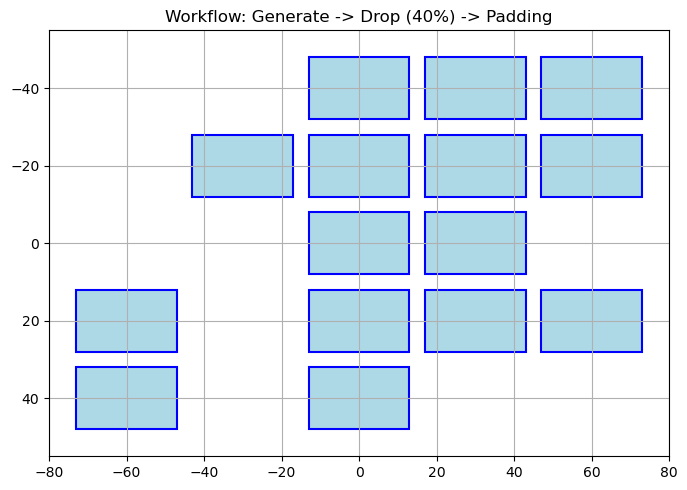

In [1]:
# 1. 正常匯入您需要的類別和生成規則
from aclg.dataclass.component import Component
from aclg.rules.spacing import spacing_grid
from aclg.post_processing.padding import add_padding
# 2. 匯入新的 drop 函式
from aclg.drop.random_drop import drop_by_ratio

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 步驟一: 生成元件 (Apply Rules) ---
root_component = Component(x=0, y=0, width=150, height=100)
# 生成一個 5x5 的網格，共 25 個元件
generated_components = spacing_grid(root_component, rows=5, cols=5)
print(f"--- 步驟一: 初始生成 {len(generated_components)} 個元件 ---")


# --- 步驟二: 隨機捨棄元件 (Drop Component) ---
# 設定捨棄 40% 的元件
dropped_components = drop_by_ratio(generated_components, drop_ratio=0.4)
print(f"--- 步驟二: 捨棄 40% 後，剩下 {len(dropped_components)} 個元件 ---")


# --- 步驟三: 後處理 (Post-processing) ---
# 對剩餘的元件增加邊界
processed_components = add_padding(dropped_components, padding=2)
print(f"--- 步驟三: 對剩餘元件進行後處理 ---")


# --- 步驟四: 視覺化結果 ---
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.set_aspect('equal', adjustable='box')

# 繪製處理後的元件
for component in processed_components:
    rect_padded = patches.Rectangle(component.get_topleft(), component.width, component.height, 
                                    linewidth=1.5, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(rect_padded)

# 設定坐標軸範圍
ax.set_xlim(-80, 80)
ax.set_ylim(-55, 55)
ax.invert_yaxis()
plt.grid(True)
plt.title("Workflow: Generate -> Drop (40%) -> Padding")
plt.show()

[Component(x=-84.12698412698413, y=0, width=31.746031746031743, height=80, level=0, relation_id=0, generate_rule='split_ratio_vertical', sub_components=None), Component(x=-44.44444444444444, y=0, width=47.61904761904762, height=80, level=0, relation_id=0, generate_rule='split_ratio_vertical', sub_components=None), Component(x=26.984126984126988, y=0, width=95.23809523809524, height=80, level=0, relation_id=0, generate_rule='split_ratio_vertical', sub_components=None), Component(x=87.3015873015873, y=0, width=25.396825396825403, height=80, level=0, relation_id=0, generate_rule='split_ratio_vertical', sub_components=None)]


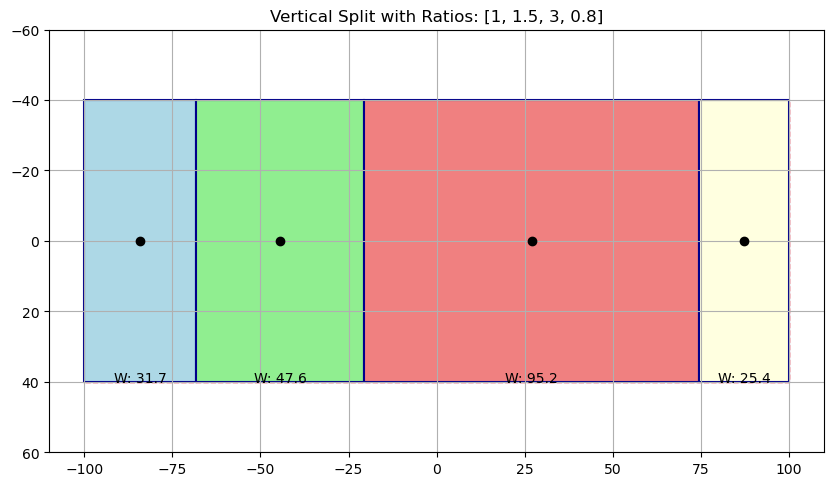

總寬度: 200.00 (應接近 200)
寬度比例驗證:
  元件 1: 1.00 (目標: 1.00)
  元件 2: 1.50 (目標: 1.50)
  元件 3: 3.00 (目標: 3.00)
  元件 4: 0.80 (目標: 0.80)


In [3]:
# 匯入新的函式和列舉
from aclg.rules.split.split_ratio import split_by_ratio, SplitOrientation
# (同時也需要匯入 Component, matplotlib 等)

# --- 範例: 使用 split_by_ratio 進行垂直分割 ---
root_component = Component(x=0, y=0, width=200, height=80)

# 定義分割比例
ratios_v = [1, 1.5, 3, 0.8]

# 執行垂直分割
split_components = split_by_ratio(
    root_component, 
    ratios=ratios_v, 
    orientation=SplitOrientation.VERTICAL
)
print(split_components)

# --- 視覺化結果 ---
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.set_aspect('equal', adjustable='box')

# 繪製原始邊界
rect_root = patches.Rectangle(root_component.get_topleft(), root_component.width, root_component.height, 
                              linewidth=1, edgecolor='red', facecolor='none', linestyle='--')
ax.add_patch(rect_root)

# 繪製分割後的元件
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for i, component in enumerate(split_components):
    rect = patches.Rectangle(component.get_topleft(), component.width, component.height, 
                             linewidth=1.5, edgecolor='darkblue', facecolor=colors[i % len(colors)])
    ax.add_patch(rect)
    # 標示中心點和寬度
    center_x, center_y = component.x, component.y
    ax.plot(center_x, center_y, 'o', color='black')
    ax.text(center_x, center_y + 40, f"W: {component.width:.1f}", ha='center')


ax.set_xlim(-110, 110)
ax.set_ylim(-60, 60)
ax.invert_yaxis()
plt.grid(True)
plt.title(f"Vertical Split with Ratios: {ratios_v}")
plt.show()

# 驗證寬度比例是否正確
total_width = sum(c.width for c in split_components)
print(f"總寬度: {total_width:.2f} (應接近 {root_component.width})")
print("寬度比例驗證:")
for i, comp in enumerate(split_components):
    print(f"  元件 {i+1}: {comp.width / split_components[0].width:.2f} (目標: {ratios_v[i]/ratios_v[0]:.2f})")

--- 範例 1: 水平向上對齊 (Top Alignment) ---
原始元件高度: [80, 80, 80, 80]
對齊後元件高度: [80.0, 64.0, 96.0, 40.0]

--- 範例 2: 垂直向左對齊 (Left Alignment) ---
原始元件寬度: [80.0, 80.0, 80.0]
對齊後元件寬度: [24.0, 96.0, 80.0]


c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31684 (\N{CJK UNIFIED IDEOGRAPH-7BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: G

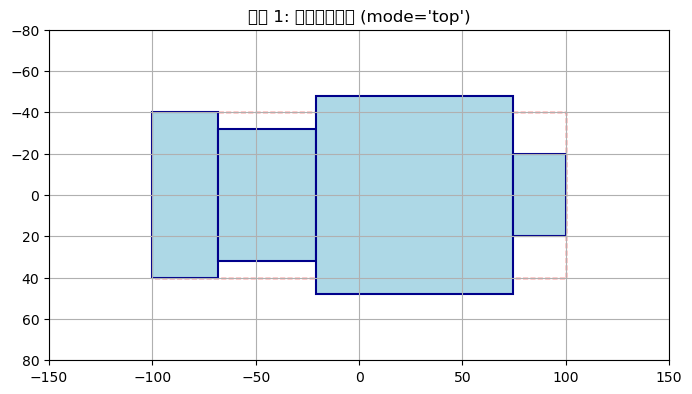

c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22402 (\N{CJK UNIFIED IDEOGRAPH-5782}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rick\anaconda3\envs\ai_PROJECT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24038 (\N{CJK UNIFIED IDEOGRAPH-5DE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


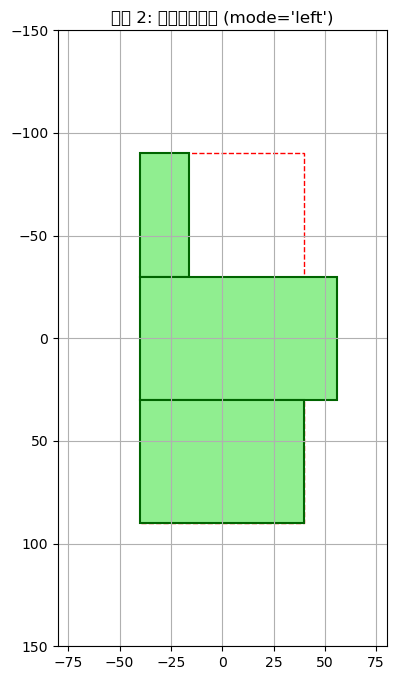

In [15]:
# ===================================================================
# 1. 匯入所有必要的類別與函式
# ===================================================================
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from aclg.dataclass.component import Component
from aclg.rules.spacing import spacing_horizontal, spacing_vertical
from aclg.rules.align import align_components, AlignmentMode

# ===================================================================
# 範例 1: 水平向上對齊 (Top Alignment)
# ===================================================================
print("--- 範例 1: 水平向上對齊 (Top Alignment) ---")

root_comp_h = Component(x=0, y=0, width=200, height=80)

# 定義分割比例
ratios_v = [1, 1.5, 3, 0.8]

# 執行垂直分割
split_components = split_by_ratio(
    root_comp_h, 
    ratios=ratios_v, 
    orientation=SplitOrientation.VERTICAL
)

# 使用 deepcopy 複製一份原始元件用於後續操作，避免互相影響
base_comps_h = copy.deepcopy(split_components)

# 打印原始高度 (應全部為 60)
print(f"原始元件高度: {[c.height for c in base_comps_h]}")

# --- 步驟 1.2: 定義縮放比例並執行向上對齊 ---
# 第一個元件高度不變 (100%), 第二個變為 80%, 第三個變為 120%
scale_factors_h = [1.0, 0.8, 1.2, 0.5] 

# 使用 AlignmentMode.TOP 進行向上對齊
aligned_comps_h = align_components(
    base_comps_h,
    scale_factors=scale_factors_h,
    mode=AlignmentMode.CENTER_H
) 

# 打印對齊後的高度 (預期新高度應為 [60*1.0, 60*0.8, 60*1.2] = [60.0, 48.0, 72.0])
print(f"對齊後元件高度: {[round(c.height, 2) for c in aligned_comps_h]}") 

# --- 步驟 1.3: 視覺化水平對齊結果 ---
fig1, ax1 = plt.subplots(1, figsize=(8, 6))
ax1.set_aspect('equal', adjustable='box')
ax1.set_title("範例 1: 水平向上對齊 (mode='top')") 

# 繪製原始的父元件邊界 (紅色虛線)
rect_root_h = patches.Rectangle(
    root_comp_h.get_topleft(), root_comp_h.width, root_comp_h.height,
    linewidth=1, edgecolor='red', facecolor='none', linestyle='--'
) 
ax1.add_patch(rect_root_h)

# 繪製對齊後的元件 (藍色實心)
for comp in aligned_comps_h:
    rect = patches.Rectangle(
        comp.get_topleft(), comp.width, comp.height,
        linewidth=1.5, edgecolor='darkblue', facecolor='lightblue'
    ) 
    ax1.add_patch(rect)

ax1.set_xlim(-150, 150)
ax1.set_ylim(-80, 80)
ax1.invert_yaxis()
ax1.grid(True)

# ===================================================================
# 範例 2: 垂直向左對齊 (Left Alignment)
# ===================================================================
print("\n--- 範例 2: 垂直向左對齊 (Left Alignment) ---")

# --- 步驟 2.1: 生成一排垂直的元件 ---
root_comp_v = Component(x=0, y=0, width=80, height=180)
vertical_comps = spacing_vertical(root_comp_v, num_components=3)
base_comps_v = copy.deepcopy(vertical_comps)

# 打印原始寬度 (應全部為 80)
print(f"原始元件寬度: {[c.width for c in base_comps_v]}")

# --- 步驟 2.2: 定義縮放比例並執行向左對齊 ---
scale_factors_v = [0.3, 1.2, 1.0]

# 使用 AlignmentMode.LEFT 進行向左對齊
aligned_comps_v = align_components(
    base_comps_v,
    scale_factors=scale_factors_v,
    mode=AlignmentMode.LEFT
)

# 打印對齊後的寬度 (預期新寬度應為 [80*0.8, 80*1.2, 80*1.0] = [64.0, 96.0, 80.0])
print(f"對齊後元件寬度: {[round(c.width, 2) for c in aligned_comps_v]}")

# --- 步驟 2.3: 視覺化垂直對齊結果 ---
fig2, ax2 = plt.subplots(1, figsize=(6, 8))
ax2.set_aspect('equal', adjustable='box')
ax2.set_title("範例 2: 垂直向左對齊 (mode='left')")

# 繪製原始的父元件邊界
rect_root_v = patches.Rectangle(
    root_comp_v.get_topleft(), root_comp_v.width, root_comp_v.height,
    linewidth=1, edgecolor='red', facecolor='none', linestyle='--'
)
ax2.add_patch(rect_root_v)

# 繪製對齊後的元件
for comp in aligned_comps_v:
    rect = patches.Rectangle(
        comp.get_topleft(), comp.width, comp.height,
        linewidth=1.5, edgecolor='darkgreen', facecolor='lightgreen'
    )
    ax2.add_patch(rect)

ax2.set_xlim(-80, 80)
ax2.set_ylim(-150, 150)
ax2.invert_yaxis()
ax2.grid(True)

# ===================================================================
# 顯示所有繪圖
# ===================================================================
plt.show()

水平比例 [5, 2, 7, 3] (4 列)
垂直比例 [2, 1] (2 行)
總共生成了 8 個元件。


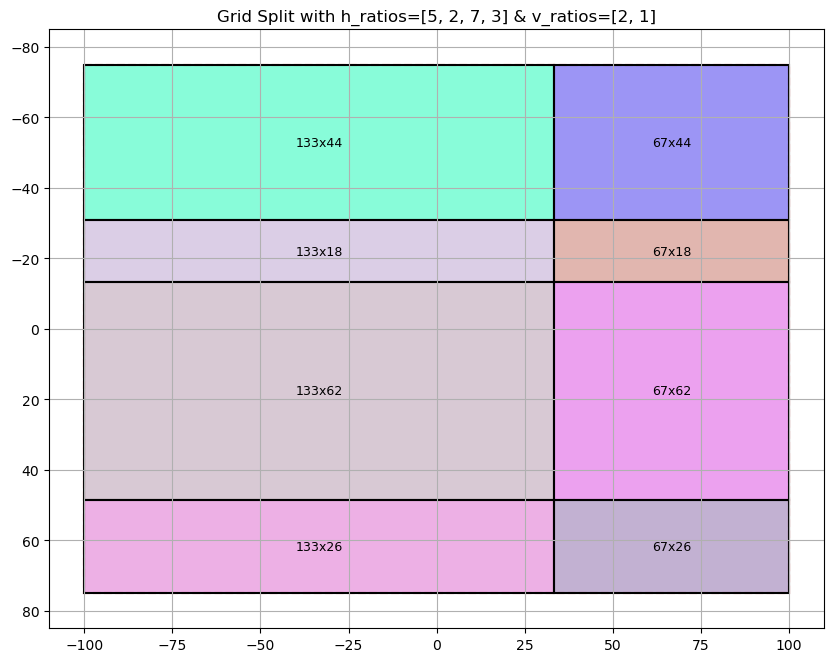

In [1]:
# 匯入必要的函式
from aclg.dataclass.component import Component
from aclg.rules.split.split_ratio import split_by_ratio_grid
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# --- 範例: 使用 split_by_ratio_grid ---
root_component = Component(x=0, y=0, width=200, height=150)

# 定義水平 (h) 和垂直 (v) 的分割比例
# h_ratios: 4 列，高度比例為 5:2:7:3
# v_ratios: 2 行，寬度比例為 2:1
h_ratios = [5, 2, 7, 3]
v_ratios = [2, 1]

# 執行比例網格分割
grid_components = split_by_ratio_grid(
    root_component, 
    h_ratios=h_ratios, 
    v_ratios=v_ratios
)

print(f"水平比例 {h_ratios} ({len(h_ratios)} 列)")
print(f"垂直比例 {v_ratios} ({len(v_ratios)} 行)")
print(f"總共生成了 {len(grid_components)} 個元件。")


# --- 視覺化結果 ---
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.set_aspect('equal', adjustable='box')

# 繪製原始邊界
rect_root = patches.Rectangle(root_component.get_topleft(), root_component.width, root_component.height, 
                              linewidth=1.5, edgecolor='red', facecolor='none', linestyle='--')
ax.add_patch(rect_root)

# 繪製分割後的網格元件
for component in grid_components:
    # 隨機給一個顏色以利區分
    rand_color = (random.random(), random.random(), random.random(), 0.5) # R, G, B, Alpha
    rect = patches.Rectangle(component.get_topleft(), component.width, component.height, 
                             linewidth=1.5, edgecolor='black', facecolor=rand_color)
    ax.add_patch(rect)
    # 標示每個元件的尺寸
    ax.text(component.x, component.y, f"{component.width:.0f}x{component.height:.0f}", 
            ha='center', va='center', fontsize=9)

ax.set_xlim(-110, 110)
ax.set_ylim(-85, 85)
ax.invert_yaxis()
plt.grid(True)
plt.title(f"Grid Split with h_ratios={h_ratios} & v_ratios={v_ratios}")
plt.show()

In [ ]:
from aclg.rules.split.split_ratio import split_by_ratio, SplitOrientation, split_by_ratio_grid
from aclg.rules.spacing import spacing_grid, spacing_vertical, spacing_horizontal
from aclg.post_processing.padding import add_padding
from aclg.rules.symetric.symmetric_1 import split_symmetric_1_horizontal, split_symmetric_1_vertical
from aclg.rules.align import align_components, AlignmentMode